In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab\ Notebooks/'job a thone'/

/content/drive/MyDrive/Colab Notebooks/job a thone


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
sample_df=pd.read_csv('sample_4E0BhPN.csv')
test_df=pd.read_csv('test_6QvDdzb.csv')
train_df=pd.read_csv('train_E1GspfA.csv')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


# Feature Engineering

In [ ]:
def data_enginerring(x_t):
    x_t=x_t.copy()
    x_t["date"]=pd.to_datetime(x_t['date'])
    x_t['year']=x_t["date"].dt.year
    x_t['month']=x_t["date"].dt.month
    x_t['week']=x_t["date"].dt.week
    x_t['day']=x_t["date"].dt.day
    return x_t
    


In [ ]:
train_df=data_enginerring(train_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
train_df.head(4)

,date,hour,demand,year,month,week,day
0,2018-08-18,9,91,2018,8,33,18
1,2018-08-18,10,21,2018,8,33,18
2,2018-08-18,13,23,2018,8,33,18
3,2018-08-18,14,104,2018,8,33,18


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(2)
poly.fit_transform(X)


array([[1.000e+00, 9.000e+00, 2.018e+03, ..., 1.089e+03, 5.940e+02,
        3.240e+02],
       [1.000e+00, 1.000e+01, 2.018e+03, ..., 1.089e+03, 5.940e+02,
        3.240e+02],
       [1.000e+00, 1.300e+01, 2.018e+03, ..., 1.089e+03, 5.940e+02,
        3.240e+02],
       ...,
       [1.000e+00, 2.100e+01, 2.021e+03, ..., 6.400e+01, 2.240e+02,
        7.840e+02],
       [1.000e+00, 2.200e+01, 2.021e+03, ..., 6.400e+01, 2.240e+02,
        7.840e+02],
       [1.000e+00, 2.300e+01, 2.021e+03, ..., 6.400e+01, 2.240e+02,
        7.840e+02]])

# Checking null values

In [ ]:
train_df.isnull().sum()

date      0
hour      0
demand    0
year      0
month     0
week      0
day       0
dtype: int64

In [ ]:
train_df.duplicated().sum()

0

# data splite into train test

In [ ]:
X=train_df[['hour', 'year', 'month', 'week', 'day']]
y=train_df['demand']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)


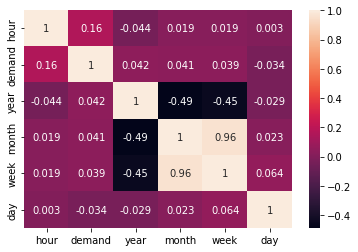

In [ ]:
sns.heatmap(train_df.corr(),annot=True)
plt.show()

# RMSE score

In [ ]:

model=LinearRegression(positive=True,normalize=True)

In [ ]:
model.fit(X_train,y_train)
print(f'train score :,{model.score(X_train,y_train)}')
pridict_y=model.predict(X_test)
print(f'test  score :,{model.score(X_test,y_test)}')
(mean_squared_error(y_test,pridict_y,squared=False))

train score :,0.03422980088364669
test  score :,0.029603952708668668


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


40.19918813975357

In [ ]:
print(f'{model.coef_}')
print(f'{model.intercept_}')

[1.07483765 4.43771883 0.8992464  0.         0.        ]
-8907.085201347398


# cross validation score

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train,y_train, cv=5,scoring=('neg_root_mean_squared_error'),)

array([-42.20048654, -41.27458512, -38.71008377, -41.51750847,
       -42.09400641])

In [ ]:
model.predict()

# dession

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model_dec=DecisionTreeRegressor() #random_state=50,ccp_alpha=0.001
model_dec.fit(X_train,y_train)
print(f'train score :,{model_dec.score(X_train,y_train)}\ntrain RMSE:  {mean_squared_error(y_train,model_dec.predict(X_train),squared=False)}')
pridict_y=model_dec.predict(X_test)
print(f'test RMSE: {mean_squared_error(y_test,pridict_y,squared=False)}')

train score :,1.0
train RMSE:  0.0
test RMSE: 45.08697227019298


## Randomforest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=800,random_state=30,ccp_alpha=0.01)

In [ ]:


regr.fit(X_train, y_train)
print(f'train RMSE: {mean_squared_error(y_train,regr.predict(X_train),squared=False)}')
print(f'test RMSE: {mean_squared_error(y_test,regr.predict(X_test),squared=False)}')



train RMSE: 12.756374838357406
test RMSE: 33.77614250251483


In [ ]:
regr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.01,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 30,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
random_grid

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
rf=RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1600}

In [ ]:
regr = RandomForestRegressor(**{'bootstrap': True,
                                'ccp_alpha': 0.001,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 800,
 'random_state':30})

In [ ]:
regr.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0.001, max_depth=20, max_features='sqrt',
                      min_samples_split=10, n_estimators=800, random_state=30)

In [ ]:
print(f'train score :{regr.score(X_train, y_train)}')
print(f'test score :{regr.score(X_test, y_test)}')


train score :0.6064386016750392
test score :0.3676753729906571


#### poly nomial

In [ ]:

regr = RandomForestRegressor(n_estimators=800,random_state=30,ccp_alpha=0.01)
regr.fit(poly.fit_transform(X_train),y_train)

RandomForestRegressor(ccp_alpha=0.01, n_estimators=800, random_state=30)

In [ ]:
print(f'train score :{regr.score(poly.fit_transform(X_train), y_train)}')
print(f'test score :{regr.score(poly.fit_transform(X_test), y_test)}')


train score :0.9082806254932392
test score :0.33918409246070025


In [ ]:
print(f'train RMSE: {mean_squared_error(y_train,regr.predict(poly.fit_transform(X_train)),squared=False)}')
print(f'test RMSE: {mean_squared_error(y_test,regr.predict(poly.fit_transform(X_test)),squared=False)}')

train RMSE: 12.686409178397131
test RMSE: 33.17286774663442


In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
regr = RandomForestRegressor(n_estimators=800,random_state=30,ccp_alpha=0.01)

In [ ]:

regr.fit(normalize(X_train),y_train)

(14597, 5)

In [ ]:
print(f'train RMSE: {mean_squared_error(y_train,regr.predict(normalize(X_train)),squared=False)}')
print(f'test RMSE: {mean_squared_error(y_test,regr.predict(normalize(X_test)),squared=False)}')

In [ ]:
regr.predict(normalize(X_test))

In [ ]:
cross_val_score(regr, X_train,y_train, cv=5,scoring=('neg_root_mean_squared_error'),)

array([-34.74167075, -34.11057258, -33.82451307, -34.46849716,
       -34.51327756])

# lasso


In [ ]:
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.01,max_iter=600)

las.fit(X_train, y_train)
print(f'train RMSE: {mean_squared_error(y_train,las.predict(X_train),squared=False)}')
print(f'test RMSE: {mean_squared_error(y_test,las.predict(X_test),squared=False)}')

train RMSE: 41.13626908662432
test RMSE: 40.20414097122999


In [ ]:
from sklearn.linear_model import ElasticNet
elas = ElasticNet()

elas.fit(X_train, y_train)
print(f'train RMSE: {mean_squared_error(y_train,elas.predict(X_train),squared=False)}')
print(f'test RMSE: {mean_squared_error(y_test,elas.predict(X_test),squared=False)}')

train RMSE: 41.18694996337923
test RMSE: 40.263169494072436


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()

kn.fit(X_train, y_train)
print(f'train RMSE: {mean_squared_error(y_train,kn.predict(X_train),squared=False)}')
print(f'test RMSE: {mean_squared_error(y_test,kn.predict(X_test),squared=False)}')

train RMSE: 28.226867250930834
test RMSE: 34.774699667808804


In [ ]:
kn = KNeighborsRegressor()
rf_random = RandomizedSearchCV(estimator = kn, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
KNeighborsRegressor().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
def model_score_check(model_):
    model1 = model_()

    model1.fit(X_train, y_train)
    print(f'train RMSE: {mean_squared_error(y_train,model1.predict(X_train),squared=False)}')
    print(f'test RMSE: {mean_squared_error(y_test,model1.predict(X_test),squared=False)}')
   


In [ ]:
from sklearn.svm import SVR

In [ ]:
model_score_check(SVR)

train RMSE: 41.970895841027904
test RMSE: 40.97834122880999


In [ ]:
from sklearn.linear_model import RANSACRegressor

In [ ]:
model_score_check(RANSACRegressor)

train RMSE: 86.0724670687277
test RMSE: 90.21579474384012


In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [ ]:
model_score_check(GaussianProcessRegressor)

train RMSE: 5.996644323632049e-08
test RMSE: 54.7829265178176


## GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model_score_check(GradientBoostingRegressor)

train RMSE: 35.603777589774104
test RMSE: 34.84243924332106


In [ ]:
from sklearn.ensemble import VotingRegressor

ereg = VotingRegressor(estimators=[('gb', GradientBoostingRegressor()), ('knn', KNeighborsRegressor()), ('lso', Lasso(alpha=0.01,max_iter=600)),('randomfore',RandomForestRegressor(n_estimators=800,random_state=30,ccp_alpha=0.01)),])

ereg = ereg.fit(X, y)


In [ ]:
print(f'train RMSE: {mean_squared_error(y_train,ereg.predict(X_train),squared=False)}')
print(f'test RMSE: {mean_squared_error(y_test,ereg.predict(X_test),squared=False)}')

train RMSE: 27.398763650424087
test RMSE: 26.771128055541425


In [ ]:
ereg = ereg.fit(X_train, y_train)

In [ ]:
print(f'train RMSE: {mean_squared_error(y_train,ereg.predict(X_train),squared=False)}')
print(f'test RMSE: {mean_squared_error(y_test,ereg.predict(X_test),squared=False)}')

train RMSE: 27.442087358924308
test RMSE: 33.3600619690349


In [ ]:
# adding hist
ereg = VotingRegressor(estimators=[('gb', GradientBoostingRegressor()), ('knn', KNeighborsRegressor()), ('lso', Lasso(alpha=0.01,max_iter=600)),('randomfore',RandomForestRegressor(n_estimators=800,random_state=30,ccp_alpha=0.01)),('histogram',HistGradientBoostingRegressor())])

ereg = ereg.fit(X, y)
print(f'train RMSE: {mean_squared_error(y_train,ereg.predict(X_train),squared=False)}')
print(f'test RMSE: {mean_squared_error(y_test,ereg.predict(X_test),squared=False)}')

train RMSE: 27.97572296902146
test RMSE: 27.39956829017875


In [ ]:
# removing lasso
ereg = VotingRegressor(estimators=[('gb', GradientBoostingRegressor()), ('knn', KNeighborsRegressor()),('randomfore',RandomForestRegressor(n_estimators=800,random_state=30,ccp_alpha=0.01)),('histogram',HistGradientBoostingRegressor())])

ereg = ereg.fit(X, y)
print(f'train RMSE: {mean_squared_error(y_train,ereg.predict(X_train),squared=False)}')
print(f'test RMSE: {mean_squared_error(y_test,ereg.predict(X_test),squared=False)}')

train RMSE: 25.832105148413387
test RMSE: 25.37698670428987


## Hist

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:

model_score_check(HistGradientBoostingRegressor)

train RMSE: 31.445747442366574
test RMSE: 32.7244163966017



* HistGradientBoostingRegressor


* GradientBoostingRegressor
* KNeighborsRegressor

* RandomForestRegressor





In [ ]:
from sklearn.ensemble import StackingRegressor
stackreg=StackingRegressor(estimators=[('gb', GradientBoostingRegressor()), ('knn', KNeighborsRegressor()), ('lso', Lasso(alpha=0.01,max_iter=600)),('randomfore',RandomForestRegressor(n_estimators=800,random_state=30,ccp_alpha=0.01)),])

In [ ]:
stackreg.fit(X_train, y_train)

StackingRegressor(estimators=[('gb', GradientBoostingRegressor()),
                              ('knn', KNeighborsRegressor()),
                              ('lso', Lasso(alpha=0.01, max_iter=600)),
                              ('randomfore',
                               RandomForestRegressor(ccp_alpha=0.01,
                                                     n_estimators=800,
                                                     random_state=30))])

In [ ]:
print(f'train RMSE: {mean_squared_error(y_train,stackreg.predict(X_train),squared=False)}')
print(f'test RMSE: {mean_squared_error(y_test,stackreg.predict(X_test),squared=False)}')

train RMSE: 20.8533811448036
test RMSE: 32.63392284385174


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model_score_check(ExtraTreesRegressor)

train RMSE: 0.07268823025473442
test RMSE: 36.8805639121466


# test data convert into trainable type

In [ ]:
 
new_test=data_enginerring(test_df)
new_test=new_test.drop(axis=0,columns='date',)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
# pridictin data and add into dataframe
test_df['demand']=model_dec.predict(new_test)
test_df['demand']=test_df['demand'].astype(np.int64,)

In [ ]:
test_df.head()

,date,hour,demand
0,2021-03-01,0,69
1,2021-03-01,1,59
2,2021-03-01,2,46
3,2021-03-01,3,16
4,2021-03-01,5,70


In [ ]:
test_df.to_csv('submission.csv',index=False)

# Experiment area 51

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
ereg = VotingRegressor(estimators=[('gb', GradientBoostingRegressor()), ('knn', KNeighborsRegressor()),('randomfore',RandomForestRegressor(n_estimators=800,random_state=30,ccp_alpha=0.01)),('histogram',HistGradientBoostingRegressor())])
poly=PolynomialFeatures(3)
ereg = ereg.fit(poly.fit_transform(X_train), y_train)


In [ ]:
poly_feature_x_train=poly.fit_transform(X_train)
poly_feature_x_test=poly.fit_transform(X_test)

In [ ]:
print(f'train RMSE: {mean_squared_error(y_train,ereg.predict(poly_feature_x_train),squared=False)}')
print(f'test RMSE: {mean_squared_error(y_test,ereg.predict(poly_feature_x_test),squared=False)}')

train RMSE: 25.446755190051114
test RMSE: 32.35199965516486


In [ ]:
poly=PolynomialFeatures(4)
ereg = ereg.fit(poly.fit_transform(X_train), y_train)
poly_feature_x_train=poly.fit_transform(X_train)
poly_feature_x_test=poly.fit_transform(X_test)
print(f'train RMSE: {mean_squared_error(y_train,ereg.predict(poly_feature_x_train),squared=False)}')
print(f'test RMSE: {mean_squared_error(y_test,ereg.predict(poly_feature_x_test),squared=False)}')

train RMSE: 25.235792853795946
test RMSE: 32.39778786600965


In [ ]:
poly=PolynomialFeatures(5)
ereg = ereg.fit(poly.fit_transform(X_train), y_train)
poly_feature_x_train=poly.fit_transform(X_train)
poly_feature_x_test=poly.fit_transform(X_test)
print(f'train RMSE: {mean_squared_error(y_train,ereg.predict(poly_feature_x_train),squared=False)}')
print(f'test RMSE: {mean_squared_error(y_test,ereg.predict(poly_feature_x_test),squared=False)}')

train RMSE: 25.163112109933248
test RMSE: 32.42196627135088


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler_x=scaler.fit_transform(X_train)
scaler_x_test=scaler.fit_transform(X_test)

In [ ]:
ereg.fit(scaler_x, y_train)

VotingRegressor(estimators=[('gb', GradientBoostingRegressor()),
                            ('knn', KNeighborsRegressor()),
                            ('randomfore',
                             RandomForestRegressor(ccp_alpha=0.01,
                                                   n_estimators=800,
                                                   random_state=30)),
                            ('histogram', HistGradientBoostingRegressor())])

In [ ]:
print(f'train RMSE: {mean_squared_error(y_train,ereg.predict(scaler_x),squared=False)}')
print(f'test RMSE: {mean_squared_error(y_test,ereg.predict(scaler_x_test),squared=False)}')

train RMSE: 25.69422552235921
test RMSE: 32.31945338196264
